<a href="https://colab.research.google.com/github/kelvinlo-yuhsiang/firstproject/blob/main/%E3%80%8CLab2_%E7%AC%AC%E4%B8%80%E5%80%8B%E8%81%96%E7%9B%83%E3%80%8D%E7%9A%848613%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#行情資料串接：https://finmind.github.io/tutor/TaiwanMarket/Technical/

In [ ]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2330",
    "start_date": "2018-09-26",
    "end_date": "2021-09-26",
    "token": "", # 參考登入，獲取金鑰
}
resp = requests.get(url, params=parameter)
data = resp.json()
df_2330 = pd.DataFrame(data["data"])
print(df_2330.head())

         date stock_id  Trading_Volume  ...  close  spread  Trading_turnover
0  2018-09-26     2330        25061115  ...  263.5     0.0              7007
1  2018-09-27     2330        38495371  ...  265.0     1.5             11536
2  2018-09-28     2330        39645486  ...  262.5    -2.5             13060
3  2018-10-01     2330        22409380  ...  263.0     0.5             11914
4  2018-10-02     2330        38391491  ...  257.5    -5.5             17095

[5 rows x 10 columns]


In [ ]:
print(df_2330.tail())

           date stock_id  Trading_Volume  ...  close  spread  Trading_turnover
726  2021-09-16     2330        23315040  ...  600.0     0.0             31437
727  2021-09-17     2330        42383815  ...  600.0     0.0             18681
728  2021-09-22     2330        42732169  ...  586.0   -14.0             70389
729  2021-09-23     2330        22736266  ...  588.0     2.0             22991
730  2021-09-24     2330        17302848  ...  598.0    10.0             15796

[5 rows x 10 columns]


In [ ]:
df_2330.to_csv('/content/df_2330.csv', encoding = "utf-8",index=False)
df_test=pd.read_csv('/content/df_2330.csv', encoding = "utf-8")
print(df_test)

           date  stock_id  Trading_Volume  ...  close  spread  Trading_turnover
0    2018-09-26      2330        25061115  ...  263.5     0.0              7007
1    2018-09-27      2330        38495371  ...  265.0     1.5             11536
2    2018-09-28      2330        39645486  ...  262.5    -2.5             13060
3    2018-10-01      2330        22409380  ...  263.0     0.5             11914
4    2018-10-02      2330        38391491  ...  257.5    -5.5             17095
..          ...       ...             ...  ...    ...     ...               ...
726  2021-09-16      2330        23315040  ...  600.0     0.0             31437
727  2021-09-17      2330        42383815  ...  600.0     0.0             18681
728  2021-09-22      2330        42732169  ...  586.0   -14.0             70389
729  2021-09-23      2330        22736266  ...  588.0     2.0             22991
730  2021-09-24      2330        17302848  ...  598.0    10.0             15796

[731 rows x 10 columns]


##畫圖顯示

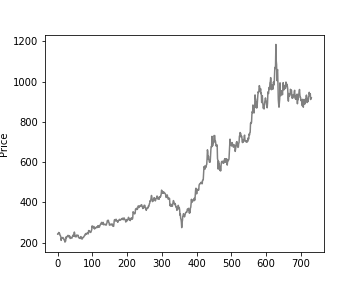

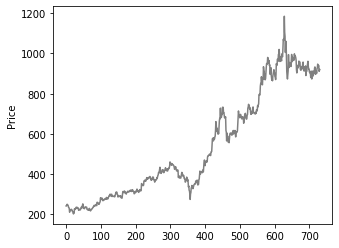

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price')
df_2330['close'].plot(ax=ax1, color='gray', figsize=(5,4))
fig.savefig('./stock1.png')
from IPython.display import Image
Image('./stock1.png')

##作業：請下載美股台積電的資料

In [ ]:
import requests
import pandas as pd

url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "USStockPrice",
    "stock_id": "TSM",
    "date": "2020-04-01",
}
data = requests.get(url, params=parameter)
data = data.json()
df_TSM = pd.DataFrame(data['data'])
print(df_TSM.head())

   Adj_Close  Close   High    Low   Open   Volume        date stock_id
0      45.20  46.51  47.56  46.30  46.83  8755200  2020-04-01      TSM
1      46.78  48.13  48.22  46.61  46.92  6174700  2020-04-02      TSM
2      45.74  47.06  48.15  46.78  47.79  5486200  2020-04-03      TSM
3      48.57  49.97  50.10  48.51  48.63  7370300  2020-04-06      TSM
4      48.32  49.72  51.32  49.66  51.29  6568700  2020-04-07      TSM


##作業：請畫出美股台積電的線圖

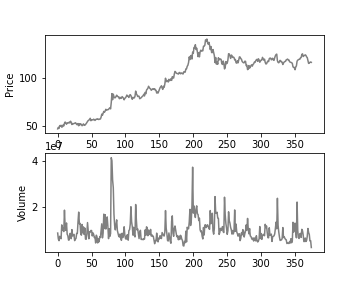

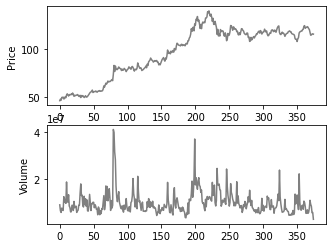

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Price')
df_TSM['Close'].plot(ax=ax1, color='gray', figsize=(5,4))
ax2 = fig.add_subplot(212, ylabel='Volume')
df_TSM['Volume'].plot(ax=ax2, color='gray', figsize=(5,4))
fig.savefig('./stock1.png')
from IPython.display import Image
Image('./stock1.png')

#技術分析

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
#!./configure --prefix=/usr/local
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

import numpy as np
import pandas as pd
import talib
from talib import MA_Type
from talib import abstract

--2021-09-26 07:04:36--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-09-26 07:04:36--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-09-26 07:04:36--  https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl

In [ ]:
#台積電
close = np.array(df_2330['close'], dtype=float)
SMA_7 = abstract.SMA(close,7) #close 代進WMA方法做計算
SMA_20 = abstract.SMA(close,20) #close 代進SMA方法做計算
df_2330['SMA_7'] = SMA_7
df_2330['SMA_20'] = SMA_20
df_2330["DIF"], df_2330["DEA"], df_2330["MACD"] = abstract.MACD(close, fastperiod=3, slowperiod=6, signalperiod=3)
print(df_2330[['close','SMA_7','SMA_20','DIF','DEA','MACD']].head(30))

df_2330.to_csv('df_2330.csv', encoding = "utf-8",index=False)
df_test=pd.read_csv('df_2330.csv', encoding = "utf-8")
print(df_test.head())

    close       SMA_7   SMA_20       DIF       DEA      MACD
0   241.5         NaN      NaN       NaN       NaN       NaN
1   241.5         NaN      NaN       NaN       NaN       NaN
2   246.5         NaN      NaN       NaN       NaN       NaN
3   250.0         NaN      NaN       NaN       NaN       NaN
4   245.0         NaN      NaN       NaN       NaN       NaN
5   246.0         NaN      NaN       NaN       NaN       NaN
6   242.0  244.642857      NaN       NaN       NaN       NaN
7   234.5  243.642857      NaN -1.930272  0.094671 -2.024943
8   233.5  242.500000      NaN -2.664480 -1.284904 -1.379576
9   228.5  239.928571      NaN -3.617486 -2.451195 -1.166291
10  210.5  234.285714      NaN -7.298204 -4.874700 -2.423505
11  220.0  230.714286      NaN -5.534432 -5.204566 -0.329866
12  221.0  227.142857      NaN -3.899594 -4.552080  0.652486
13  222.0  224.285714      NaN -2.544353 -3.548216  1.003863
14  224.5  222.857143      NaN -1.161145 -2.354681  1.193536
15  225.0  221.642857   

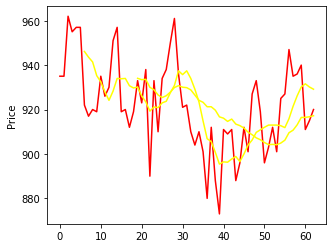

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price')
#df.plot(ax=ax1, figsize=(10,8))
df_2330['close'].plot(ax=ax1, color='red', figsize=(5,4))
df_2330['SMA_7'].plot(ax=ax1, color='yellow', figsize=(5,4))
df_2330['SMA_20'].plot(ax=ax1, color='yellow', figsize=(5,4))
fig.savefig('./stock1.png')
from IPython.display import Image
#Image('./stock1.png')

##作業：請做出 KD 指標

In [ ]:
import numpy as np
import pandas as pd
from talib import abstract
df_2330=pd.read_csv('/content/df_2330.csv', encoding = "utf-8")
df_2330=df_2330.rename(columns={"Close":"close","max": "high","min":"low"})

#畫技術指標-KD值
df_temp=abstract.STOCH(df_2330,fastk_period=9, slowk_period=3,slowd_period=3)
df_2330=df_2330.join(df_temp)
print(df_2330)

#畫技術指標-RSI值
df_2330["RSI"]=abstract.RSI(df_2330)
print(df_2330)

#畫技術指標-WILLR值
#df_2330["WILLR"]=abstract.WILLR(df_2330)
#print(df_2330)

          date  stock_id  ...      slowk      slowd
0   2021-06-28      2330  ...        NaN        NaN
1   2021-06-29      2330  ...        NaN        NaN
2   2021-06-30      2330  ...        NaN        NaN
3   2021-07-01      2330  ...        NaN        NaN
4   2021-07-02      2330  ...        NaN        NaN
..         ...       ...  ...        ...        ...
58  2021-09-16      2330  ...   7.306314  19.137947
59  2021-09-17      2330  ...   1.807082   8.055720
60  2021-09-22      2330  ...   4.079809   4.397735
61  2021-09-23      2330  ...   7.391775   4.426222
62  2021-09-24      2330  ...  18.939394  10.136993

[63 rows x 12 columns]
          date  stock_id  Trading_Volume  ...      slowk      slowd        RSI
0   2021-06-28      2330        15401977  ...        NaN        NaN        NaN
1   2021-06-29      2330        30837548  ...        NaN        NaN        NaN
2   2021-06-30      2330        34021380  ...        NaN        NaN        NaN
3   2021-07-01      2330        1871

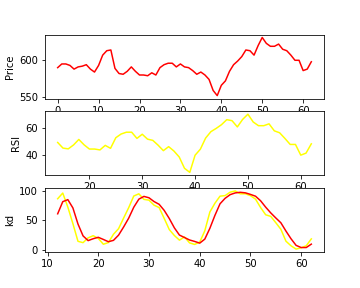

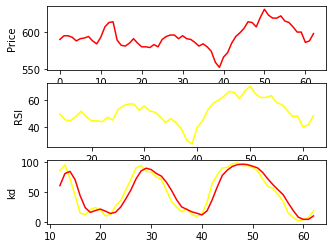

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Price')
df_2330['close'].plot(ax=ax1, color='red', figsize=(5,4))
ax2 = fig.add_subplot(312, ylabel='RSI')
df_2330['RSI'].plot(ax=ax2, color='yellow', figsize=(5,4))
ax2 = fig.add_subplot(313, ylabel='kd')
df_2330['slowk'].plot(ax=ax2, color='yellow', figsize=(5,4))
df_2330['slowd'].plot(ax=ax2, color='red', figsize=(5,4))

fig.savefig('./stock1.png')
from IPython.display import Image
Image('./stock1.png')

#第一個聖盃：2330追高殺低

In [ ]:
import datetime
df_2330=pd.read_csv('/content/df_2330.csv', encoding = "utf-8")
close = np.array(df_2330['close'], dtype=float)
SMA_7 = abstract.SMA(close,20) #close 代進WMA方法做計算
SMA_20 = abstract.SMA(close,28) #close 代進SMA方法做計算
RSI  = abstract.RSI(close)
df_2330['SMA_7'] = SMA_7
df_2330['SMA_20'] = SMA_20
df_2330['RSI'] = RSI
df_2330["DIF"], df_2330["DEA"], df_2330["MACD"] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df_2330['星期幾'] = ''
df_2330['多空交易'] = ''
df_2330['持倉'] = ''
df_2330['該筆交易損益'] = ''
df_2330['總交易損益'] = 0

trade=0
trade_price=0
total_time=0
total_GetMoney=0
win_time=0
the_cost=-40

for i in range(0,len(df_2330.index)):
    if np.isnan( df_2330['DIF'].iloc[i]) == False:
        trade_day=str(df_2330['date'].iloc[i])[:10]
        if trade==0:
            trade_price=df_2330['close'].iloc[i]
            #改策略
            #if df_2330['close'].iloc[i] >= df_2330['SMA_7'].iloc[i] and df_2330['close'].iloc[i] >= df_2330['SMA_20'].iloc[i]:
            if df_2330['RSI'].iloc[i] <= 20:
                trade=1
                df_2330['持倉'].iloc[i]='1'
                df_2330['多空交易'].iloc[i]='做多'

            trade_day=datetime.datetime.strptime(str(df_2330['date'].iloc[i])[:10], '%Y-%m-%d')
            data_list_tradeday=[]
            data_list_tradeday.append(trade_day)

        elif trade==1:
            if df_2330['close'].iloc[i] <= df_2330['SMA_7'].iloc[i] or df_2330['close'].iloc[i] <= df_2330['SMA_20'].iloc[i]:
                trade=0
                if (df_2330['close'].iloc[i] - trade_price) >= 0:
                    df_2330['多空交易'].iloc[i]='賺錢'
                    df_2330['持倉'].iloc[i]='+0'
                    win_time = win_time+1
                else:
                    df_2330['多空交易'].iloc[i]='賠錢'
                    df_2330['持倉'].iloc[i]='-0'

                df_2330['該筆交易損益'].iloc[i]=df_2330['close'].iloc[i] - trade_price
                total_GetMoney=total_GetMoney+df_2330['該筆交易損益'].iloc[i]
                total_time=total_time+1
                #print('total_GetMoney'+str(total_GetMoney))


        df_2330['總交易損益'].iloc[i] = total_GetMoney
        
print(df_2330)
df_2330.to_csv('/content/df_result.csv', encoding = 'utf-8', index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


           date  stock_id  Trading_Volume  Trading_money  ...  多空交易  持倉  該筆交易損益  總交易損益
0    2018-09-26      2330        25061115     6577367245  ...                      0.0
1    2018-09-27      2330        38495371    10185827315  ...                      0.0
2    2018-09-28      2330        39645486    10412455506  ...                      0.0
3    2018-10-01      2330        22409380     5882532290  ...                      0.0
4    2018-10-02      2330        38391491     9926505357  ...                      0.0
..          ...       ...             ...            ...  ...   ...  ..     ...    ...
726  2021-09-16      2330        23315040    14030697248  ...                     66.0
727  2021-09-17      2330        42383815    25510152115  ...                     66.0
728  2021-09-22      2330        42732169    25056693727  ...                     66.0
729  2021-09-23      2330        22736266    13406035166  ...                     66.0
730  2021-09-24      2330        17302848  

##損益圖

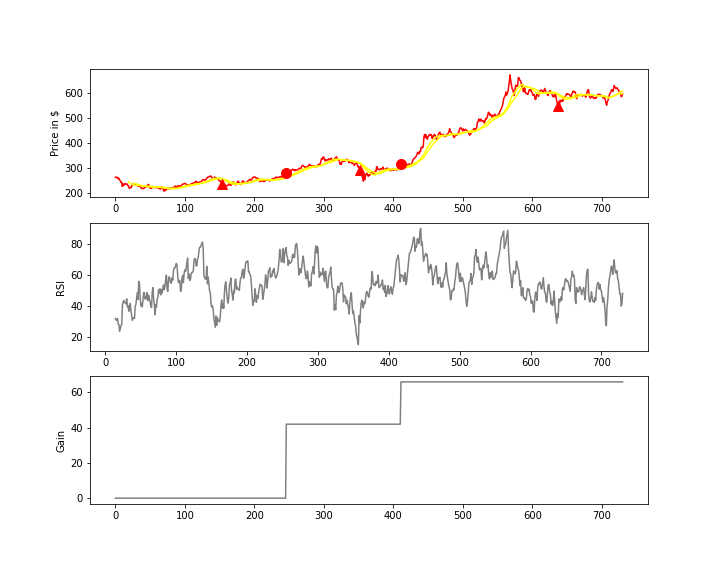

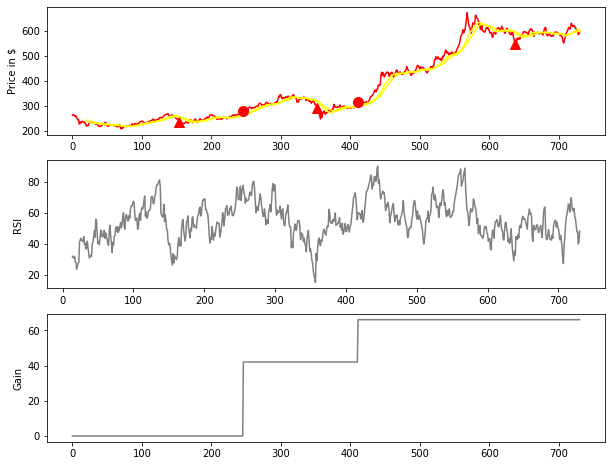

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Price in $')
df_2330['close'].plot(ax=ax1, color='red', figsize=(5,4))
df_2330['SMA_7'].plot(ax=ax1, color='yellow', figsize=(5,4))
df_2330['SMA_20'].plot(ax=ax1, color='yellow', figsize=(5,4))

ax2 = fig.add_subplot(312, ylabel='RSI')
df_2330['RSI'].plot(ax=ax2, color='gray', figsize=(10,8))

ax3 = fig.add_subplot(313, ylabel='Gain')
df_2330['總交易損益'].plot(ax=ax3, color='gray', figsize=(10,8))
ax1.plot(df_2330.loc[df_2330['持倉'] == '1'].index,df_2330['close'][df_2330['持倉'] == '1'],'^', markersize=10, color='r')
ax1.plot(df_2330.loc[df_2330['持倉'] == '-1'].index,df_2330['close'][df_2330['持倉'] == '-1'],'v', markersize=10, color='g')
ax1.plot(df_2330.loc[df_2330['持倉'] == '+0'].index,df_2330['close'][df_2330['持倉'] == '+0'],'o', markersize=10, color='r')
ax1.plot(df_2330.loc[df_2330['持倉'] == '-0'].index,df_2330['close'][df_2330['持倉'] == '-0'],'o', markersize=10, color='g')

fig.savefig('./stock2.png')
from IPython.display import Image
Image('./stock2.png')

##作業：請做出 RSI 程式交易

In [ ]:
#df = ffn.get('^TWII', start=(datetime.datetime.utcnow()-datetime.timedelta(days=+36*1)))
#df = ffn.get('^TWII', start=(datetime.datetime.utcnow()-datetime.timedelta(days=+365*3)))
#df = ffn.get('^TWII', start=(datetime.datetime.utcnow()-datetime.timedelta(days=+100)), end=(datetime.datetime.utcnow()+datetime.timedelta(hours=+8)))
df_2330=pd.read_csv('/content/df_2330.csv', encoding = "utf-8")

df_2330 = df_2330.rename(columns={"twii": "close"})
close = np.array(df_2330['close'], dtype=float)
RSI = abstract.RSI(close)
df_2330['RSI'] = RSI
df_2330['星期幾'] = ''
df_2330['多空交易'] = ''
df_2330['持倉'] = ''
df_2330['該筆交易損益'] = ''
df_2330['總交易損益'] = 0
print(df_2330)

trade=0
trade_price=0
total_time=0
total_GetMoney=0
win_time=0
the_cost=-40

for i in range(0,len(df_2330.index)):
    if np.isnan( df_2330['RSI'].iloc[i]) == False:
        trade_day=str(df_2330['date'].iloc[i])[:10]
        if trade==0:
            trade_price=df_2330['close'].iloc[i]
            if df_2330['RSI'].iloc[i] <= 30:
                trade=1
                df_2330['持倉'].iloc[i]='1'
                df_2330['多空交易'].iloc[i]='做多'


            trade_day=datetime.datetime.strptime(str(df_2330['date'].iloc[i])[:10], '%Y-%m-%d')
            data_list_tradeday=[]
            data_list_tradeday.append(trade_day)

        elif trade==1:
            if df_2330['RSI'].iloc[i] >= 70:
                trade=0

                if (df_2330['close'].iloc[i] - trade_price) >= 0:
                    df_2330['多空交易'].iloc[i]='賺錢'
                    df_2330['持倉'].iloc[i]='+0'
                    win_time = win_time+1
                else:
                    df_2330['多空交易'].iloc[i]='賠錢'
                    df_2330['持倉'].iloc[i]='-0'

                df_2330['該筆交易損益'].iloc[i]=df_2330['close'].iloc[i] - trade_price
                total_GetMoney=total_GetMoney+df_2330['該筆交易損益'].iloc[i]
                total_time=total_time+1
                #print('total_GetMoney'+str(total_GetMoney))


        df_2330['總交易損益'].iloc[i] = total_GetMoney
        
print(df_2330)
df_2330.to_csv('/content/df_result.csv', encoding = 'utf-8', index=True)

           date  stock_id  Trading_Volume  Trading_money  ...  多空交易  持倉  該筆交易損益  總交易損益
0    2018-09-26      2330        25061115     6577367245  ...                        0
1    2018-09-27      2330        38495371    10185827315  ...                        0
2    2018-09-28      2330        39645486    10412455506  ...                        0
3    2018-10-01      2330        22409380     5882532290  ...                        0
4    2018-10-02      2330        38391491     9926505357  ...                        0
..          ...       ...             ...            ...  ...   ...  ..     ...    ...
718  2021-09-06      2330        59223061    37250623087  ...                        0
719  2021-09-07      2330        27422775    17191259166  ...                        0
720  2021-09-08      2330        38713621    23960375113  ...                        0
721  2021-09-09      2330        19309522    11886107760  ...                        0
722  2021-09-10      2330        16740439  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


           date  stock_id  Trading_Volume  Trading_money  ...  多空交易  持倉  該筆交易損益  總交易損益
0    2018-09-26      2330        25061115     6577367245  ...                      0.0
1    2018-09-27      2330        38495371    10185827315  ...                      0.0
2    2018-09-28      2330        39645486    10412455506  ...                      0.0
3    2018-10-01      2330        22409380     5882532290  ...                      0.0
4    2018-10-02      2330        38391491     9926505357  ...                      0.0
..          ...       ...             ...            ...  ...   ...  ..     ...    ...
718  2021-09-06      2330        59223061    37250623087  ...                     84.5
719  2021-09-07      2330        27422775    17191259166  ...                     84.5
720  2021-09-08      2330        38713621    23960375113  ...                     84.5
721  2021-09-09      2330        19309522    11886107760  ...                     84.5
722  2021-09-10      2330        16740439  

In [ ]:
print(df_2330.tail())

           date  stock_id  Trading_Volume  Trading_money  ...  多空交易  持倉  該筆交易損益  總交易損益
721  2021-09-09      2330        19309522    11886107760  ...                    230.5
722  2021-09-10      2330        16740439    10365721937  ...                    230.5
723  2021-09-13      2330        15809768     9734528161  ...                    230.5
724  2021-09-14      2330        16024935     9849961184  ...                    230.5
725  2021-09-15      2330        26041452    15872971715  ...                    230.5

[5 rows x 20 columns]


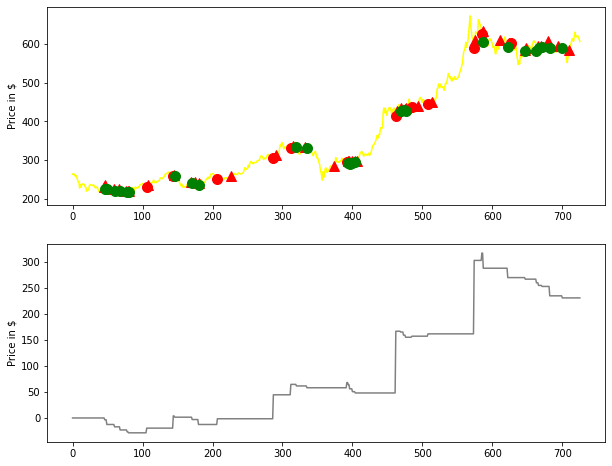

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Price in $')
df_2330['close'].plot(ax=ax1, color='yellow', figsize=(5,4))
ax2 = fig.add_subplot(212, ylabel='Price in $')
df_2330['總交易損益'].plot(ax=ax2, color='gray', figsize=(10,8))
ax1.plot(df_2330.loc[df_2330['持倉'] == '1'].index,df_2330['close'][df_2330['持倉'] == '1'],'^', markersize=10, color='r')
ax1.plot(df_2330.loc[df_2330['持倉'] == '-1'].index,df_2330['close'][df_2330['持倉'] == '-1'],'v', markersize=10, color='g')
ax1.plot(df_2330.loc[df_2330['持倉'] == '+0'].index,df_2330['close'][df_2330['持倉'] == '+0'],'o', markersize=10, color='r')
ax1.plot(df_2330.loc[df_2330['持倉'] == '-0'].index,df_2330['close'][df_2330['持倉'] == '-0'],'o', markersize=10, color='g')

fig.savefig('./stock2.png')
from IPython.display import Image
#Image('./stock2.png')

#第二個聖盃：台指期沖沖沖

In [ ]:
#!wget -O /content/download.7z https://drive.google.com/u/0/uc?id=1LS2-trOX-eT7nn8-T2ytaJBKNMN6dQiD&export=download
!wget -O /content/today_future_all.csv https://drive.google.com/u/0/uc?id=1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF&export=download

--2021-09-26 03:49:07--  https://drive.google.com/u/0/uc?id=1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.102, 142.251.8.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qigtsuhfo6q56ln43oirll7l27e88p3/1632628125000/01280177523055167044/*/1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF [following]
--2021-09-26 03:49:07--  https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qigtsuhfo6q56ln43oirll7l27e88p3/1632628125000/01280177523055167044/*/1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF
Resolving doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)|74.125.

In [ ]:
import pandas as pd
import numpy as np
import datetime
df_future=pd.read_csv('/content/today_future_all.csv', encoding = "utf-8")
print(df_future.head())

                         Date         合約  close
0  2021-01-04_11:13:06.542000  MXF202102  14875
1  2021-01-04_11:14:00.363000  MXF202102  14876
2  2021-01-04_11:15:00.191000  MXF202102  14881
3  2021-01-04_11:16:00.200000  MXF202102  14885
4  2021-01-04_11:17:00.006000  MXF202102  14881


##沖沖沖主程式

In [ ]:
def call_function(flag, df):
    #print("inside call function:",df.index)
    df = df.reset_index(drop=True)

    trade = 0
    trade_price = 0
    total_time = 0
    TOTAL_GETMONEY = 0
    win_time = 0
    
    price_array = np.array(df["close"], dtype=float)
    df["SMA_7"] = np.round( talib.SMA(price_array, flag.SMA_parameter),2 )  # close 代進WMA方法做計算
    df["SMA_20"] = np.round( talib.SMA(price_array, flag.SMA_parameter * 3 ),2 )  # close 代進SMA方法做計算
    # H_line,M_line,L_line=talib.BBANDS(price_array, timeperiod=10, nbdevup=3, nbdevdn=3, matype=0)
    # df['H_line']=H_line
    # df['L_line']=L_line
    # df['H_line-L_line']=H_line-L_line
    #df["DIF"], df["DEA"], df["MACD"] = np.round( talib.MACD(price_array, fastperiod=12*5, slowperiod=26*5, signalperiod=9*5),2 )
    #df["DIF"], df["DEA"], df["MACD"] = np.round( talib.MACD(price_array, fastperiod=12*flag.MACD_parameter, slowperiod=26*flag.MACD_parameter, signalperiod=9*flag.MACD_parameter),2 )
    #df["DIF_MACD"] = df["DIF"] - df["MACD"]
    #df["RSI_7"] = talib.RSI(price_array,timeperiod=5*20)
    #df["RSI_20"] = talib.RSI(price_array,timeperiod=10*20)
    list_多空交易 = ["" for i in range(0, len(df.index))]
    list_持倉 = ["" for i in range(0, len(df.index))]
    list_該筆交易損益 = ["" for i in range(0, len(df.index))]
    list_總交易損益 = [0 for i in range(0, len(df.index))]
    # print(df.info(memory_usage='deep'))
    # print(list_多空交易)
    # print(df)

    # 交易
    for index, row in df.iterrows():

        # if (np.isnan( df['DIF'].iloc[i]) == False) and (  int(df['Date'].iloc[i][11:13]) >= 8 ):
        # print('row["Date"][11:13])：'+row['Date'][11:13])
        # if (index <= 10):
        if np.isnan(row["SMA_20"]):
            # print("前幾筆不下單")
            pass

        else:
            NOW_TIME = row['Date']
            NOW_MONTH = int(NOW_TIME[5:7])
            NOW_DAY = int(NOW_TIME[8:10])
            NOW_HOUR = int(NOW_TIME[11:13])
            NOW_MINI = int(NOW_TIME[14:16])
            NOW_SEC = int(NOW_TIME[17:19])
            NOW_WEEK = datetime.datetime.strptime(NOW_TIME[:10], "%Y-%m-%d").weekday()


            ########################################################順勢###########################################
            if trade == 0:
                if (
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    #or (NOW_WEEK == 4 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期五自動平倉
                    ):
                    list_多空交易[index] = "要收盤了，不下單"
                else:
                    if (
                        - flag.SMA_thres <= (row['SMA_7'] - row['SMA_20']) <= flag.SMA_thres
                        ):
                        list_多空交易[index] = "盤整盤，準備逆勢下單"
                        #trade_forward_reverse = "reverse"
                        trade_forward_reverse = "forward"
                    else:
                        list_多空交易[index] = "準備順勢下單"
                        trade_forward_reverse = "forward"

                    trade_already = False
                    # if df['DIF'].iloc[i] >= df['DIF'].iloc[i-1] and df['price'].iloc[i] >= df['SMA_7'].iloc[i] and df['price'].iloc[i] >= df['SMA_20'].iloc[i]:
                    # if (row['price']>=price_old) and (row['price'] >= row['SMA_7']) and (row['price'] >= row['SMA_20']) and (row['H_line']-row['L_line'] >=flag.stoploss):

                    if (
                        #改策略
                        row["close"] >= (row["SMA_7"] + flag.stoploss) 
                        and row["close"] >= (row["SMA_20"] + flag.stoploss)

                        #row['DIF'] > row['MACD']
                        #row['DIF_MACD'] > 0
                        #row['MACD'] > 0
                        
                        #and ( row['DIF'] >= flag.MACD_thres or row['DIF'] <= (0-flag.MACD_thres) )
                        #and ( row['MACD'] >= flag.MACD_thres or row['MACD'] <= (0-flag.MACD_thres) )

                        #row['DIF'] > flag.DIF_thres and row['MACD'] > flag.DIF_thres

                        #row['RSI_7'] > row['RSI_20']

                    ):
                        # if row['MACD'] >= new_threshold:
                        # if row['price'] >= row['H_line'] + new_threshold:
                        # if (row['MACD'] >= new_threshold) and (row['H_line']-row['L_line'] >=30):
                        trade = 1
                        trade_price = row["close"]
                        list_持倉[index] = '1'
                        if trade_forward_reverse == "forward":
                            list_多空交易[index] = '順勢做多'
                        else:
                            list_多空交易[index] = '逆勢做空'
                        
    
                    # elif row['MACD'] <= -(new_threshold):
                    # elif row['price'] <= row['L_line'] - new_threshold:
                    # elif (row['MACD'] <= -(new_threshold)) and (row['H_line']-row['L_line'] >=30):
                    # elif (row['price'] <= (row['SMA_7']-flag.stoploss)) and (row['price'] <= (row['SMA_20']-flag.stoploss)) and (row['SMA_7']>=SMA_old2):
                    # elif (row['price'] <= (row['SMA_7']-flag.stoploss)):
                    elif (
                        #改策略
                        row["close"] <= (row["SMA_7"] - flag.stoploss) 
                        and row["close"] <= (row["SMA_20"] - flag.stoploss)

                        #row['DIF'] < row['MACD']
                        #row['DIF_MACD'] < 0
                        #row['MACD'] < 0
                        
                        #and ( row['DIF'] >= flag.MACD_thres or row['DIF'] <= (0-flag.MACD_thres) )
                        #and ( row['MACD'] >= flag.MACD_thres or row['MACD'] <= (0-flag.MACD_thres) )

                        #row['DIF'] < (0-flag.DIF_thres) and row['MACD'] < (0-flag.DIF_thres)

                        #row['RSI_7'] < row['RSI_20']
                    ):
                        trade = -1
                        trade_price = row["close"]
                        list_持倉[index]='-1'
                        list_多空交易[index]='順勢做空'
                        

            elif trade == 1:
                if not trade_already:
                    if trade_forward_reverse == "forward":
                        list_多空交易[index] = '順勢做多'
                    else:
                        list_多空交易[index] = '逆勢做空'
                else:
                    list_多空交易[index] = "空手"

                # if df['DIF'].iloc[i] <= df['DIF'].iloc[i-1] or df['price'].iloc[i] <= df['SMA_7'].iloc[i] or df['price'].iloc[i] <= df['SMA_20'].iloc[i]:
                # if row['price'] <= (row['SMA_7']-10) or row['price'] <= (row['SMA_20']-10):
                # if ( row['price'] <= (row['SMA_7']-flag.stoploss) or row['price'] <= (row['SMA_20']-flag.stoploss) ) and (trade_already==False):
                if ((
                    #改策略
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] < (row["SMA_7"] + flag.stoploss) 
                    or  row["close"] < (row["SMA_20"] + flag.stoploss)
                    #or row['DIF_MACD'] < 0
                    or row["close"] - trade_price <= flag.stoploss
                ) and (not trade_already) and ( trade_forward_reverse == "forward") 
                ) or ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] < (row["SMA_7"] + flag.stoploss) 
                    or  row["close"] < (row["SMA_20"] + flag.stoploss)
                    #or row['DIF_MACD'] < 0
                    or trade_price - row["close"] <= flag.stoploss
                ) and (not trade_already) and ( trade_forward_reverse == "reverse")
                ): 
                    #or (row["price"] >= (trade_price + flag.stoploss * 1))

                    trade_already = True
                    if trade_forward_reverse == "forward":
                        if (row['close'] - trade_price) >= 0:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        else:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        list_該筆交易損益[index]= row['close'] - trade_price
                    else:
                        if (row['close'] - trade_price) >= 0:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        else:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        list_該筆交易損益[index]= trade_price - row['close']




                    TOTAL_GETMONEY = TOTAL_GETMONEY + list_該筆交易損益[index]

                    total_time = total_time + 1
                    

                    
                # 價格有回來才可再下單
                if (row["close"] <= (row["SMA_7"])) and (trade_already):
                #if (row['DIF'] <= row['MACD']) and (trade_already) :
                #if row['MACD']<0 and trade_already :
                #if row['DIF_MACD'] < 0 and (trade_already) :
                #if (row['RSI_7'] <= row['RSI_20']) and (trade_already) :
                    # if (row['price'] <= (row['SMA_7']-0) or row['price'] <= (row['SMA_20']-0) ) and (trade_already==True):
                    trade = 0

            elif trade == -1:
                # list_多空交易[index]='做空'
                # 逆勢
                if not trade_already:
                    if trade_forward_reverse == "forward":
                        list_多空交易[index] = '順勢做空'
                    else:
                        list_多空交易[index] = '逆勢做多'
                else:
                    list_多空交易[index] = "空手"
                # if ( row['price'] >= (row['SMA_7']+flag.stoploss) or row['price'] >= (row['SMA_20']+flag.stoploss) ) and (trade_already==False):
                if ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] > (row["SMA_7"] - flag.stoploss) 
                    or row["close"] > (row["SMA_20"] - flag.stoploss)
                    #or row['DIF_MACD'] > 0
                    or trade_price - row["close"] <= flag.stoploss
                ) and (not trade_already) and (trade_forward_reverse == "forward")
                ) or ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] > (row["SMA_7"] - flag.stoploss) 
                    or row["close"] > (row["SMA_20"] - flag.stoploss)
                    #or row['DIF_MACD'] > 0
                    or row["close"]- trade_price <= flag.stoploss
                ) and (not trade_already) and (trade_forward_reverse == "reverse")
                ):


                    trade_already = True
                    if trade_forward_reverse == "forward":
                        if (trade_price - row['close']) >= 0:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        else:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        list_該筆交易損益[index]= trade_price - row['close']
                    else:
                        if (trade_price - row['price']) >= 0:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        else:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        list_該筆交易損益[index]= row['price'] - trade_price
       


                    TOTAL_GETMONEY = TOTAL_GETMONEY + list_該筆交易損益[index]

                    total_time = total_time + 1
                    # print('TOTAL_GETMONEY'+str(TOTAL_GETMONEY))

                    
                # 價格有回來才可再下單
                if (row["close"] >= (row["SMA_7"])) and (trade_already):
                #if (row['DIF'] >= row['MACD']) and (trade_already) :
                #if row['DIF_MACD'] > 0 and (trade_already) :
                #if row['MACD'] > 0 and trade_already :
                #if (row['RSI_7'] >= row['RSI_20']) and (trade_already) :
                    # if (row['price'] >= (row['SMA_7']+0) or row['price'] >= (row['SMA_20']+0) ) and (trade_already==True):
                    trade = 0
            ########################################################順勢###########################################
    
            list_總交易損益[index] = TOTAL_GETMONEY
            
    try:
        win_rate = int(win_time / total_time * 100)
    except:
        print("沒事，win_rate=0")
        win_rate = 0
    
    df["多空交易"] = list_多空交易
    df["持倉"] = list_持倉
    df["該筆交易損益"] = list_該筆交易損益
    df["總交易損益"] = list_總交易損益
    return flag, df, trade_price, total_time, win_rate


In [ ]:
class Flag:
  def __init__(self):
    self.stoploss = -100        
    self.SMA_thres = 1
    self.SMA_parameter = 100
            
flag = Flag()
flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future)
print(df_future.tail())

                       Date         合約  close  ...  持倉  該筆交易損益 總交易損益
176758  2021-09-11 04:55:01  MXF202109  17387  ...  +0     247  2333
176759  2021-09-11 04:56:00  MXF202109  17389  ...              2333
176760  2021-09-11 04:57:06  MXF202109  17388  ...              2333
176761  2021-09-11 04:58:05  MXF202109  17386  ...              2333
176762  2021-09-11 04:59:00  MXF202109  17384  ...              2333

[5 rows x 9 columns]


##損益圖

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


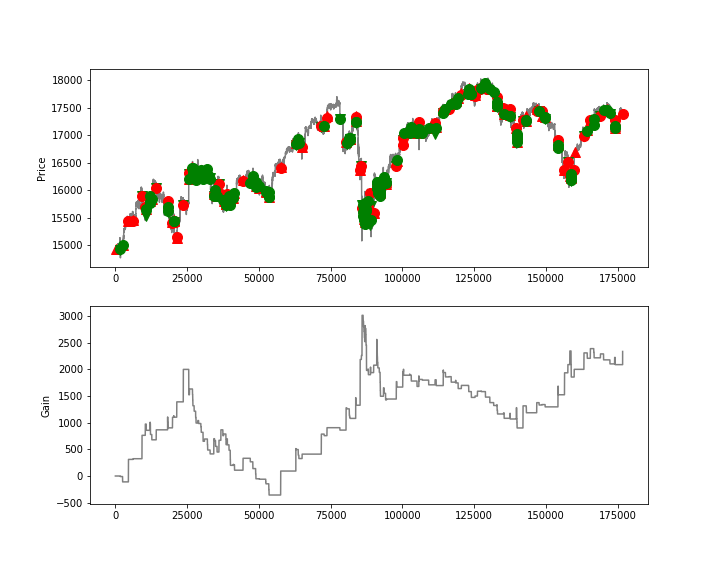

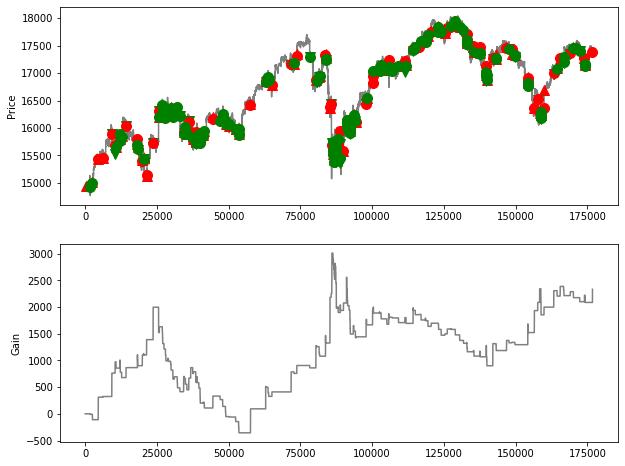

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.close('all')
fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Price')
df_future['close'].plot(ax=ax1, color='gray', figsize=(10,8))
ax1.plot(df_future.loc[df_future['持倉'] == '1'].index,df_future['close'][df_future['持倉'] == '1'],'^', markersize=10, color='r')
ax1.plot(df_future.loc[df_future['持倉'] == '-1'].index,df_future['close'][df_future['持倉'] == '-1'],'v', markersize=10, color='g')
ax1.plot(df_future.loc[df_future['持倉'] == '+0'].index,df_future['close'][df_future['持倉'] == '+0'],'o', markersize=10, color='r')
ax1.plot(df_future.loc[df_future['持倉'] == '-0'].index,df_future['close'][df_future['持倉'] == '-0'],'o', markersize=10, color='g')

ax2 = fig.add_subplot(212, ylabel='Gain')
df_future['總交易損益'].plot(ax=ax2, color='gray', figsize=(10,8))
fig.savefig('./stock1.png')
from IPython.display import Image
Image('./stock1.png')

##作業：改成 RSI 策略

--2021-09-26 07:06:42--  https://drive.google.com/u/0/uc?id=1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF
Resolving drive.google.com (drive.google.com)... 173.194.195.113, 173.194.195.102, 173.194.195.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ndtafllifu1atgdod0l54uhgk5tsu2b4/1632639975000/01280177523055167044/*/1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF [following]
--2021-09-26 07:06:42--  https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ndtafllifu1atgdod0l54uhgk5tsu2b4/1632639975000/01280177523055167044/*/1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF
Resolving doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com

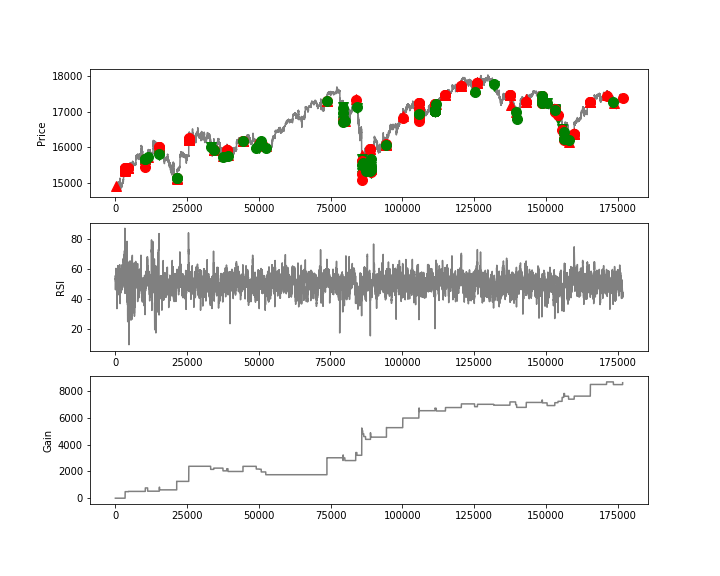

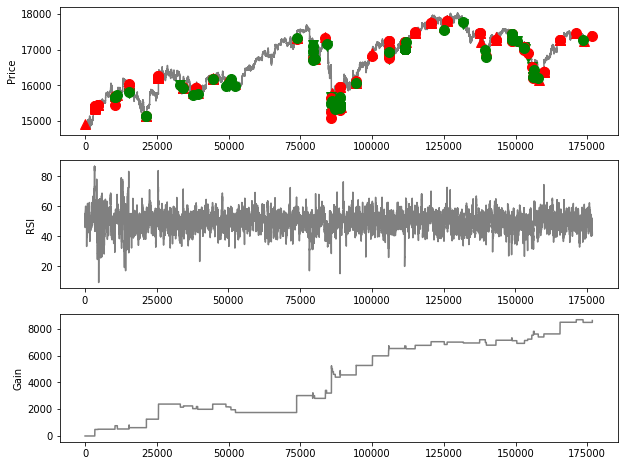

In [ ]:
!wget -O /content/today_future_all.csv https://drive.google.com/u/0/uc?id=1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF&export=download
import pandas as pd
import numpy as np
import datetime
df_future=pd.read_csv('/content/today_future_all.csv', encoding = "utf-8")
def call_function(flag, df):
    #print("inside call function:",df.index)
    df = df.reset_index(drop=True)

    trade = 0
    trade_price = 0
    total_time = 0
    TOTAL_GETMONEY = 0
    win_time = 0
    
    price_array = np.array(df["close"], dtype=float)
    df["RSI"] = talib.RSI(price_array,timeperiod=5*20)
    list_多空交易 = ["" for i in range(0, len(df.index))]
    list_持倉 = ["" for i in range(0, len(df.index))]
    list_該筆交易損益 = ["" for i in range(0, len(df.index))]
    list_總交易損益 = [0 for i in range(0, len(df.index))]

    # 交易
    for index, row in df.iterrows():
            NOW_TIME = row['Date']
            NOW_MONTH = int(NOW_TIME[5:7])
            NOW_DAY = int(NOW_TIME[8:10])
            NOW_HOUR = int(NOW_TIME[11:13])
            NOW_MINI = int(NOW_TIME[14:16])
            NOW_SEC = int(NOW_TIME[17:19])
            NOW_WEEK = datetime.datetime.strptime(NOW_TIME[:10], "%Y-%m-%d").weekday()

            if trade == 0:
                list_多空交易[index] = "準備順勢下單"
                trade_already = False
                if (
                    #改多單策略
                    row['RSI'] > 49
                ):
                    trade = 1
                    trade_price = row["close"]
                    list_持倉[index] = '1'
                        
                elif (
                    #改空單策略
                    row['RSI'] < 37
                ):
                    trade = -1
                    trade_price = row["close"]
                    list_持倉[index]='-1'
                    list_多空交易[index]='順勢做空'
                        
            elif trade == 1:
                if (
                    #改平倉策略
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row['RSI'] > 81
                    or row["close"] - trade_price <= flag.stoploss
                ): 
                  trade = 0
                  if (row['close'] - trade_price) >= 0:
                      list_持倉[index]='+0'
                      list_多空交易[index]='賺錢'
                      win_time = win_time+1
                  else:
                      list_持倉[index]='-0'
                      list_多空交易[index]='賠錢'
                  list_該筆交易損益[index]= row['close'] - trade_price
                  TOTAL_GETMONEY = TOTAL_GETMONEY + list_該筆交易損益[index]
                  total_time = total_time + 1

            elif trade == -1:
                if (
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    #改平倉策略
                    or row['RSI'] < 32
                    or trade_price - row["close"] <= flag.stoploss
                ):
                  trade = 0
                  if (trade_price - row['close']) >= 0:
                      list_持倉[index]='+0'
                      list_多空交易[index]='賺錢'
                      win_time = win_time+1
                  else:
                      list_持倉[index]='-0'
                      list_多空交易[index]='賠錢'
                  list_該筆交易損益[index]= trade_price - row['close']

                  TOTAL_GETMONEY = TOTAL_GETMONEY + list_該筆交易損益[index]

                  total_time = total_time + 1
    
            list_總交易損益[index] = TOTAL_GETMONEY
            
    try:
        win_rate = int(win_time / total_time * 100)
    except:
        print("沒事，win_rate=0")
        win_rate = 0
    
    df["多空交易"] = list_多空交易
    df["持倉"] = list_持倉
    df["該筆交易損益"] = list_該筆交易損益
    df["總交易損益"] = list_總交易損益
    return flag, df, trade_price, total_time, win_rate

class Flag:
  def __init__(self):
    self.stoploss = -200
            
flag = Flag()
flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future)
print(df_future.tail())

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.close('all')
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Price')
df_future['close'].plot(ax=ax1, color='gray', figsize=(10,8))
ax1.plot(df_future.loc[df_future['持倉'] == '1'].index,df_future['close'][df_future['持倉'] == '1'],'^', markersize=10, color='r')
ax1.plot(df_future.loc[df_future['持倉'] == '-1'].index,df_future['close'][df_future['持倉'] == '-1'],'v', markersize=10, color='g')
ax1.plot(df_future.loc[df_future['持倉'] == '+0'].index,df_future['close'][df_future['持倉'] == '+0'],'o', markersize=10, color='r')
ax1.plot(df_future.loc[df_future['持倉'] == '-0'].index,df_future['close'][df_future['持倉'] == '-0'],'o', markersize=10, color='g')

ax2 = fig.add_subplot(312, ylabel='RSI')
df_future['RSI'].plot(ax=ax2, color='gray', figsize=(10,8))

ax3 = fig.add_subplot(313, ylabel='Gain')
df_future['總交易損益'].plot(ax=ax3, color='gray', figsize=(10,8))
fig.savefig('./stock1.png')
from IPython.display import Image
Image('./stock1.png')